In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sn

from sklearn.model_selection import train_test_split
sn.set_context('poster')
sn.set_color_codes()
plot_kwds = {'alpha': 0.30, 's': 80, 'linewidths': 0}

data = pd.read_csv('/Users/jtangira/Downloads/Pers/MLDataSets/100datasets/warm-up/classifiers/bow-tie.csv')
data.describe()

data[['t']].nunique()
data['t'].unique()

array([0., 1.])

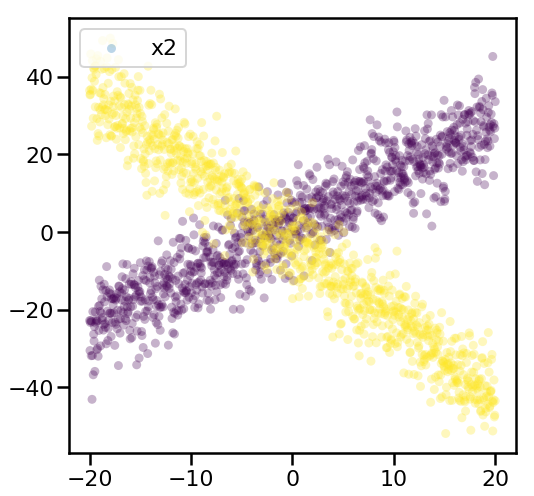

In [4]:
plt.rcParams['figure.figsize'] = (8,8)
plt.scatter(data['x1'], data['x2'], c=data['t'], **plot_kwds)
plt.legend(loc='upper left')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

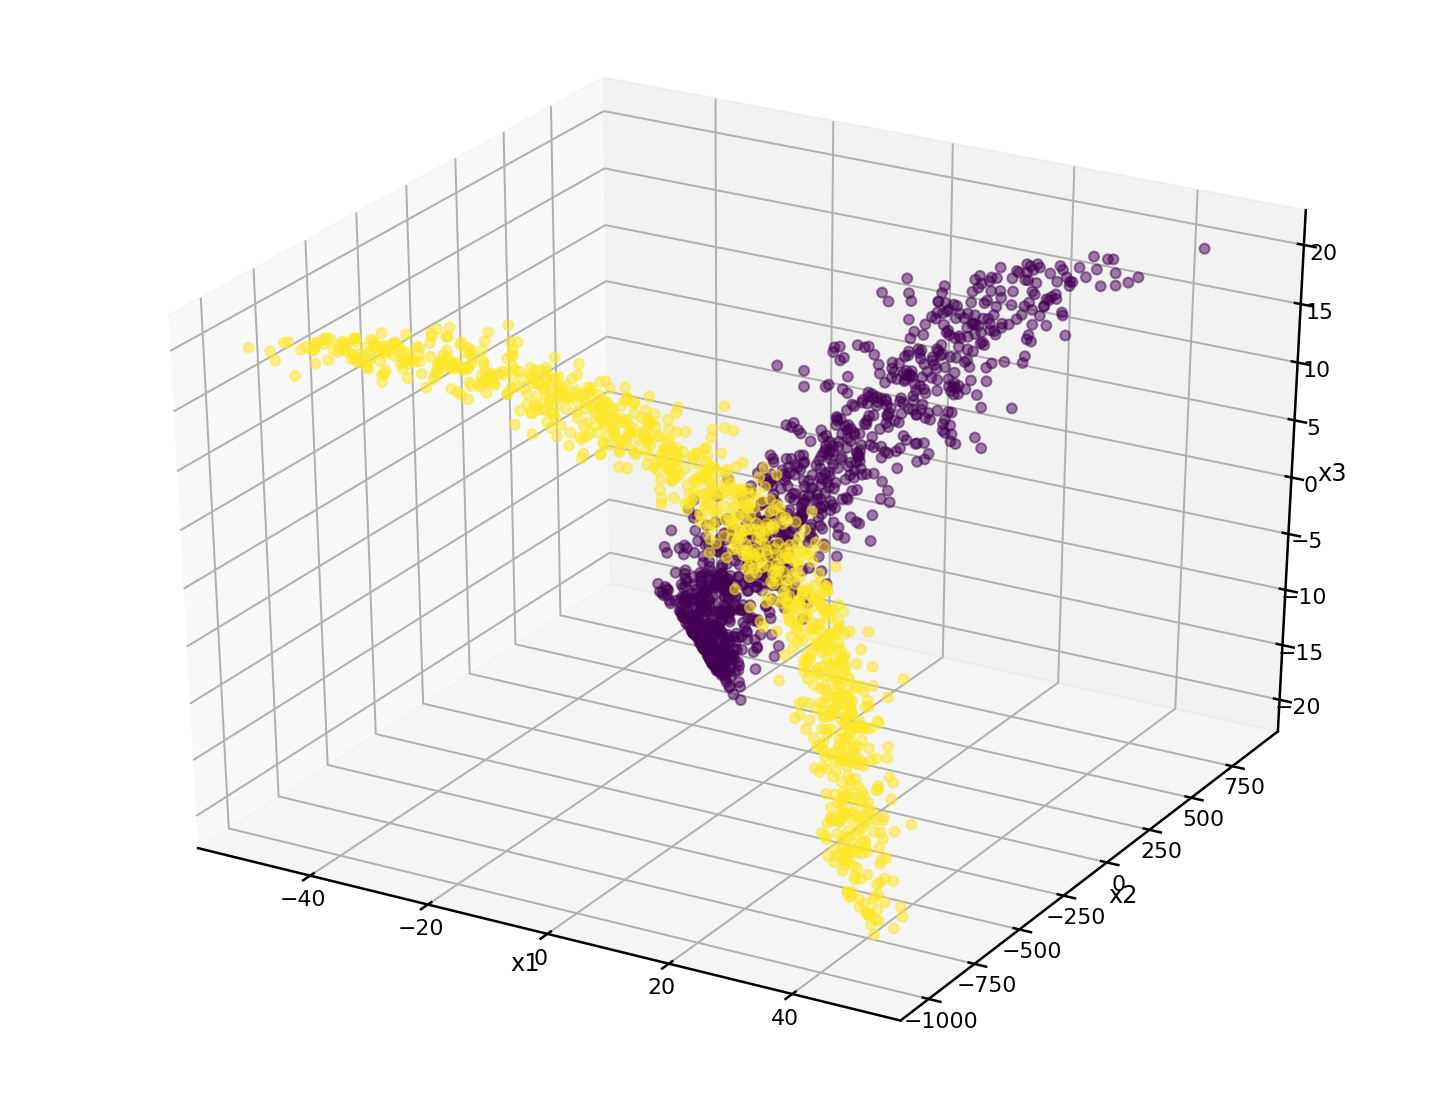

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = "20,15"

fig = plt.figure()
axis = Axes3D(fig)

axis.scatter(data['x2'], data['x3'],data['x1'],c = data.t, s = 100, alpha=0.5)

axis.set_xlabel("x1")
axis.set_ylabel("x2")
axis.set_zlabel("x3")
plt.show

In [30]:
X, t = data[['x1','x2', 'x3']], data['t'].astype('category')
X_train, X_test, t_train, t_test = train_test_split(X, t, random_state = 42)
X_train.describe()

,x1,x2,x3
count,1500.000000,1500.000000,1500.000000
mean,-0.089690,-0.067379,-47.216209
std,11.751299,20.813152,315.050954
min,-20.000000,-51.902993,-1012.751242
25%,-10.590591,-16.000009,-203.024902
50%,-0.020020,0.785496,-0.720739
75%,10.200200,16.626852,133.703099
max,20.000000,49.869455,851.762160


In [31]:
X_test.describe()

,x1,x2,x3
count,500.000000,500.000000,500.000000
mean,0.269069,-1.341220,-39.722263
std,10.979195,19.884498,293.711367
min,-19.919920,-47.192509,-941.960592
25%,-8.658659,-15.283817,-145.544534
50%,0.200200,-0.900840,-0.197873
75%,9.479479,13.161551,116.928298
max,19.959960,45.178150,892.709388


In [32]:
# SVM - Linear

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

clf = svm.SVC(kernel='linear', C=0.001)
clf.fit(X_train, t_train)
labels = clf.predict(X_test)

matrix = confusion_matrix(t_test, labels)
report = classification_report(t_test, labels)
print(matrix)
print(report)

accuracy = metrics.accuracy_score(t_test, labels)
print("Accuracy: {}".format(accuracy))

[[243  14]
 [ 31 212]]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92       257
         1.0       0.94      0.87      0.90       243

   micro avg       0.91      0.91      0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

Accuracy: 0.91


In [33]:
# SVM - rbf

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

clfrbf = svm.SVC(kernel='rbf', C=1, gamma=0.01)
clfrbf.fit(X_train, t_train)
labels = clfrbf.predict(X_test)

matrix = confusion_matrix(t_test, labels)
report = classification_report(t_test, labels)
print(matrix)
print(report)

accuracy = metrics.accuracy_score(t_test, labels)
print("Accuracy: {}".format(accuracy))

[[236  21]
 [ 22 221]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       257
         1.0       0.91      0.91      0.91       243

   micro avg       0.91      0.91      0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

Accuracy: 0.914


In [34]:
# LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
print(lda)
X_train_lda = lda.fit_transform(X_train, t_train)
print(X_train_lda)

X_test_labels = lda.predict(X_test) #gives you the predicted label for each sample
X_test_prob = lda.predict_proba(X_test) #the probability of each sample to belong to each class

matrix = confusion_matrix(t_test, X_test_labels)
report = classification_report(t_test, X_test_labels)
print(matrix)
print(report)

accuracy = metrics.accuracy_score(t_test, X_test_labels)
print("Accuracy: {}".format(accuracy))

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
[[ 0.48331023]
 [-0.15404773]
 [-1.91733304]
 ...
 [-1.44461222]
 [-0.24326967]
 [ 1.11273009]]
[[256   1]
 [ 68 175]]
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       257
         1.0       0.99      0.72      0.84       243

   micro avg       0.86      0.86      0.86       500
   macro avg       0.89      0.86      0.86       500
weighted avg       0.89      0.86      0.86       500

Accuracy: 0.862


In [35]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
clfRF = RandomForestClassifier(n_estimators=50)
clfRF.fit(X_train,t_train)
t_pred = clfRF.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(t_test,t_pred))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(t_test, t_pred)
print(matrix)

Accuracy: 0.892
[[231  26]
 [ 28 215]]


In [36]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, t_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, t_train) 
    return clf_gini 

# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, t_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, t_train) 
    return clf_entropy 

# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: \n", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 

# Building Phase  
clf_gini = train_using_gini(X_train, X_test, t_train) 
clf_entropy = train_using_entropy(X_train, X_test, t_train) 

# Operational Phase 
print("Results Using Gini Index:") 
      
# Prediction using gini 
t_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(t_test, t_pred_gini) 

print("Results Using Entropy:") 
# Prediction using entropy 
t_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(t_test, t_pred_entropy)

Results Using Gini Index:
Predicted values:
[1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 0. 

In [37]:
# Gradient Boosting / XGBoost
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, t_train)

classifier.score(X_test, t_test)
labels = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
matrix = confusion_matrix(t_test, labels)
report = classification_report(t_test, labels)
print(matrix)
print(report)

print("Accuracy:",metrics.accuracy_score(t_test,t_pred))

[[235  22]
 [ 26 217]]
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91       257
         1.0       0.91      0.89      0.90       243

   micro avg       0.90      0.90      0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

Accuracy: 0.892


# Neural Net - Hangs - Fix the errors

import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import AveragePooling2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

#X_train_nn = np.array(X_train)
#X_test_nn = np.array(X_test)

model = Sequential()
#First Hidden Layer
model.add(Dense(120,  input_dim=3, activation='relu', name='first'))
#model.add(Dropout(0.5))
#Second  Hidden Layer
model.add(Dense(84, activation='relu', name='second'))
#Output Layer
model.add(Dense(2, activation='softmax', name='output'))

model.summary()

print(X_train.shape)
#print(X_train[0].shape)
print(t_train.shape)

#Compiling the neural network
model.compile(optimizer ='adam',loss='categorical_crossentropy', metrics =['accuracy'])

t_train_nn = keras.utils.np_utils.to_categorical(t_train)

#Fitting the data to the training dataset
model.fit(X_train, t_train_nn, batch_size=10, epochs=10)

t_pred_nn = model.predict(X_test)

t_test_nn = keras.utils.np_utils.to_categorical(t_test)

score = model.evaluate(X_test, t_test_nn, verbose=0)
print("Test Loss:", score[0])
print("Accuracy:", score[1])


# K Means

plot_kwds = {'alpha': 0.70, 's': 80, 'linewidths': 0}

plt.rcParams['figure.figsize'] = (50,60)

wss=[]

for i in range(1,5):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_train)
    kmeans.predict(X_test)
    y_kmeans = kmeans.labels_
    wss.append(kmeans.inertia_)
    
    fig=plt.subplot(5,3,i)
    fig.scatter(X_train['x'], X_train['y'], c=y_kmeans, **plot_kwds)
    title= "k={0}".format(i)
    fig.set_title(title)
    
plt.show()

In [38]:

from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

db = DBSCAN(eps=4, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1, len(unique_labels))]


plt.rcParams['figure.figsize'] = (10,10)

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]
        
    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy['x'], xy['y'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
    
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy['x'], xy['y'], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9, alpha=0.15)

    
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

plt.title('Estimated number of cluster: %d' % n_clusters_)
plt.show()



KeyError: 'x'